In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## From above code, data types of columns can be known and also if there is any null values in dataset, we can find it.

In [4]:
# Loop through object columns and display value counts
for col in data.select_dtypes(include='object').columns:
    print(f"Value counts for '{col}':\n{data[col].value_counts()}\n")

Value counts for 'sex':
sex
male      676
female    662
Name: count, dtype: int64

Value counts for 'smoker':
smoker
no     1064
yes     274
Name: count, dtype: int64

Value counts for 'region':
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

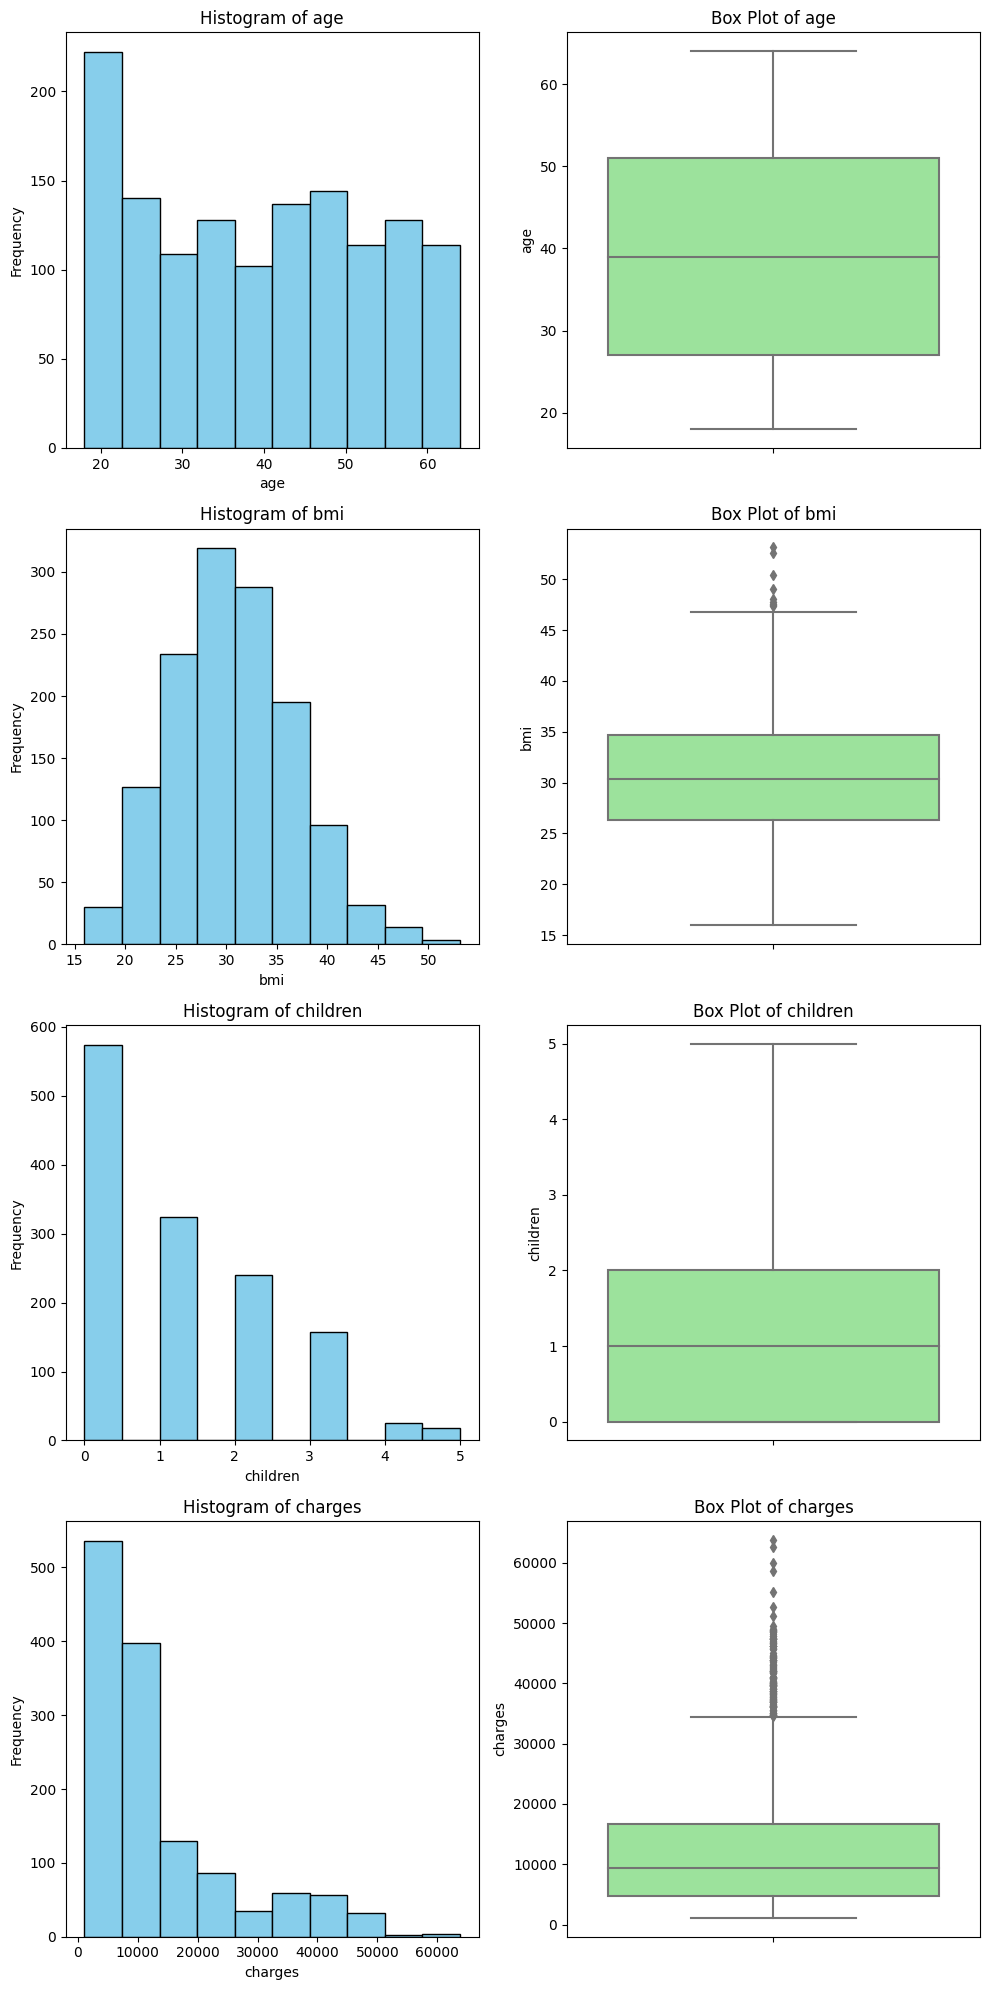

In [14]:
num_columns = data.select_dtypes(include='number').columns
n_cols = len(num_columns)

fig, axs = plt.subplots(n_cols, 2, figsize=(10, 5 * n_cols))

for i, col in enumerate(num_columns):
    # Histogram
    axs[i, 0].hist(data[col], bins=10, color='skyblue', edgecolor='black')
    axs[i, 0].set_title(f'Histogram of {col}')
    axs[i, 0].set_xlabel(col)
    axs[i, 0].set_ylabel('Frequency')
    
 # Box Plot
    sns.boxplot(data=data, y=col, ax=axs[i, 1], color='lightgreen')
    axs[i, 1].set_title(f'Box Plot of {col}')
    axs[i, 1].set_ylabel(col)

plt.tight_layout()
plt.show()

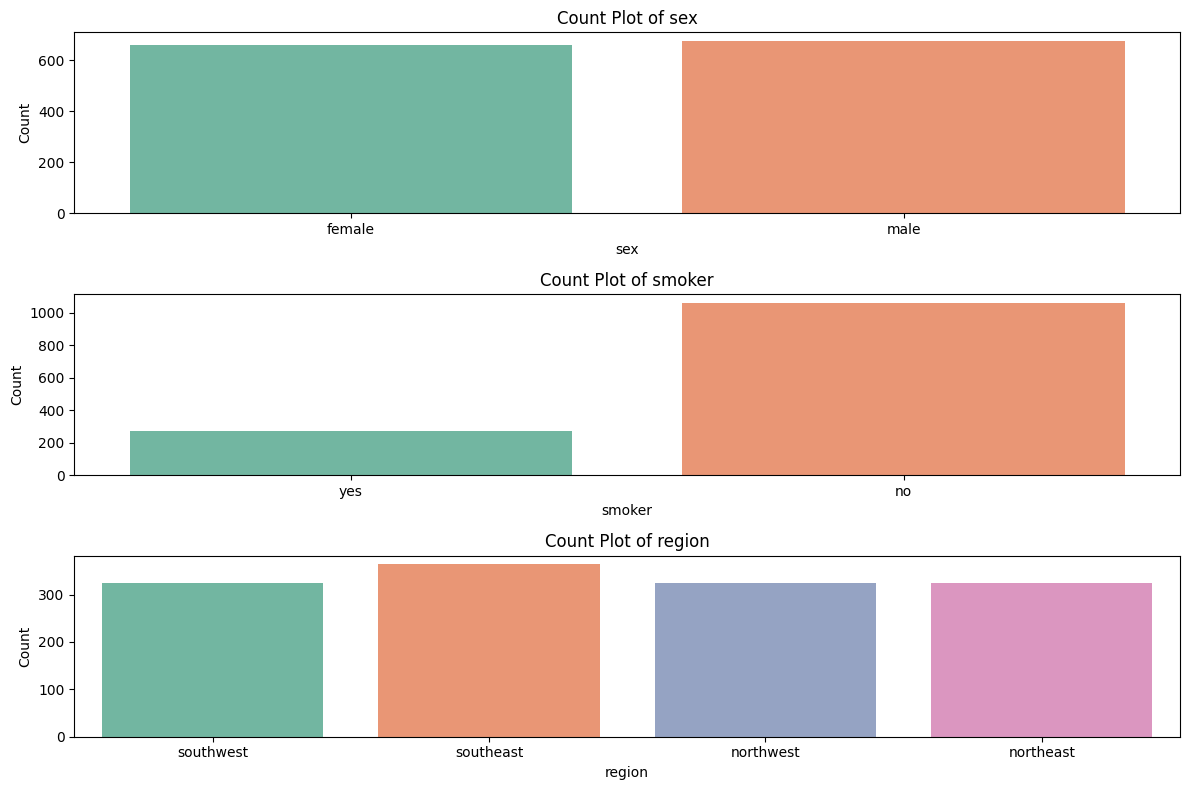

In [17]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(data.select_dtypes(include='object').columns):
    plt.subplot(len(data.select_dtypes(include='object').columns), 1, i + 1) 
    sns.countplot(data=data,x=col,palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()